# Eksamen


## Bilmarkedet
Af: Mathias Nikolaisen(dnt357), Oliver Mattthews(jvc975) & Clara Maj Folkmann(djz279)

### Problem 1

In [1]:
#1.a
import pandas as pd
df = pd.read_csv("cars.csv")
df.head()

,year,product_id,make,model,parent,sales,number_households,price,height,footprint,...,HEV,PHEV,EV,car,suv,truck,van,market_share,no_car,dlogS
0,1980,0,alfa romeo,alfa romeo veloce,ili,2997.0,80780000,33.673122,51.65,10781.700,...,0,0,0,1,0,0,0,0.000093,0.684795,-8.906947
1,1980,1,amc,amc concord,renault,64991.0,80780000,14.033105,51.60,13135.000,...,0,0,0,1,0,0,0,0.002011,0.684795,-5.830310
2,1980,2,amc,amc eagle,renault,32641.0,80780000,20.854034,55.10,13229.600,...,0,0,0,1,0,0,0,0.001010,0.684795,-6.518989
3,1980,3,amc,amc pacer,renault,2083.0,80780000,15.772140,52.95,13596.585,...,0,0,0,1,0,0,0,0.000064,0.684795,-9.270749
4,1980,4,amc,amc spirit,renault,49723.0,80780000,12.721277,51.60,12024.000,...,0,0,0,1,0,0,0,0.001539,0.684795,-6.098091


In [4]:
df.describe()

,year,product_id,sales,number_households,price,height,footprint,weight,hp,mpg,...,HEV,PHEV,EV,car,suv,truck,van,market_share,no_car,dlogS
count,9694.000000,9694.000000,9694.000000,9.694000e+03,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,...,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9.694000e+03,9694.000000,9694.000000
mean,2001.096761,486.674954,59103.391036,1.072133e+08,36.047691,60.948141,13392.630004,3561.211136,192.181968,20.936151,...,0.032907,0.007737,0.008665,0.631937,0.231277,0.070559,0.066227,1.422180e-03,0.650272,-7.252747
std,11.076957,278.997528,86940.254077,1.393279e+07,17.126564,8.411517,1968.915195,897.765526,83.882441,6.583005,...,0.178402,0.087622,0.092687,0.482303,0.421671,0.256100,0.248690,2.098420e-03,0.048143,1.961685
min,1980.000000,0.000000,10.000000,8.078000e+07,11.144782,43.500000,6514.540000,1113.000000,44.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.980669e-07,0.578260,-15.081906
25%,1992.000000,252.000000,7990.500000,9.567000e+07,24.081777,54.700000,12000.155000,2925.000000,127.500000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.831745e-04,0.619893,-8.189256
50%,2002.000000,512.000000,27394.000000,1.093000e+08,31.820235,57.700000,13330.064000,3470.500000,175.000000,19.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.379377e-04,0.644168,-6.919975
75%,2011.000000,693.000000,74560.500000,1.186800e+08,43.404583,67.100000,14532.730000,4045.500000,250.000000,23.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.779007e-03,0.672930,-5.887575
max,2018.000000,1066.000000,891482.000000,1.275900e+08,99.986388,107.500000,21821.859000,8550.000000,645.000000,50.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.104001e-02,0.777283,-3.318301


In [ ]:
import numpy as np

df = pd.read_csv("cars.csv")

# 'type' based on dummys
conditions = [
    df['car'] == 1,
    df['suv'] == 1,
    df['truck'] == 1,
    df['van'] == 1
]
choices = ['car', 'suv', 'truck', 'van']
df['type'] = np.select(conditions, choices, default='other')

# Group & average
grouped_data = df.groupby(['year', 'type']).agg({
    'price': 'mean',
    'market_share': 'mean',
    'hp': 'mean',
    'mpg': 'mean',
    'footprint': 'mean',
    'weight': 'mean'
}).reset_index()

# Tjek de første rækker for at sikre, at data er korrekt grupperet og aggregeret
print(grouped_data.head())



   year   type      price  market_share          hp        mpg     footprint  \
0  1980    car  27.561363      0.002108  101.576000  21.064000  12751.886259   
1  1980    suv  22.520828      0.000496  127.555556  15.444444  13494.740100   
2  1980  truck  17.396227      0.001710  116.043478  16.108696  15434.728261   
3  1980    van  20.235159      0.000986  113.875000  15.750000  14426.730000   
4  1981    car  27.597300      0.002002  101.645161  22.500000  12480.265213   

        weight  
0  2887.468000  
1  3597.444444  
2  3766.695652  
3  3885.500000  
4  2901.116935  


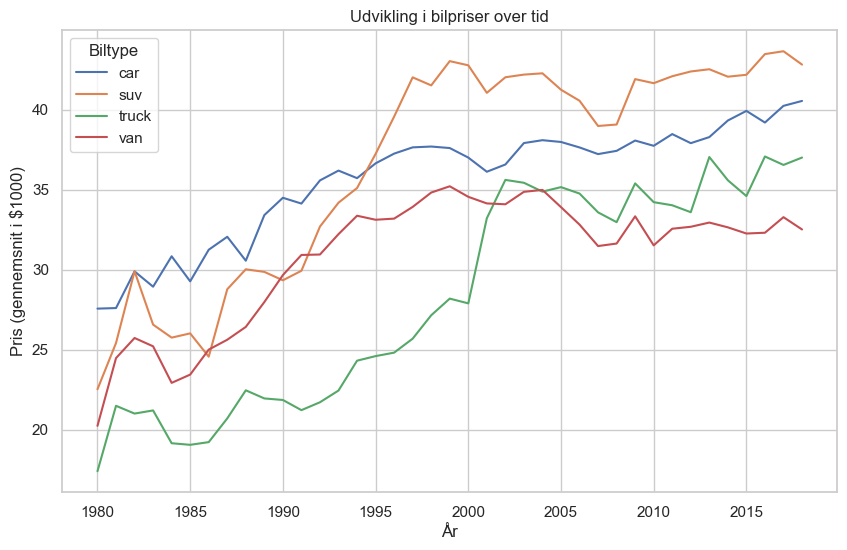

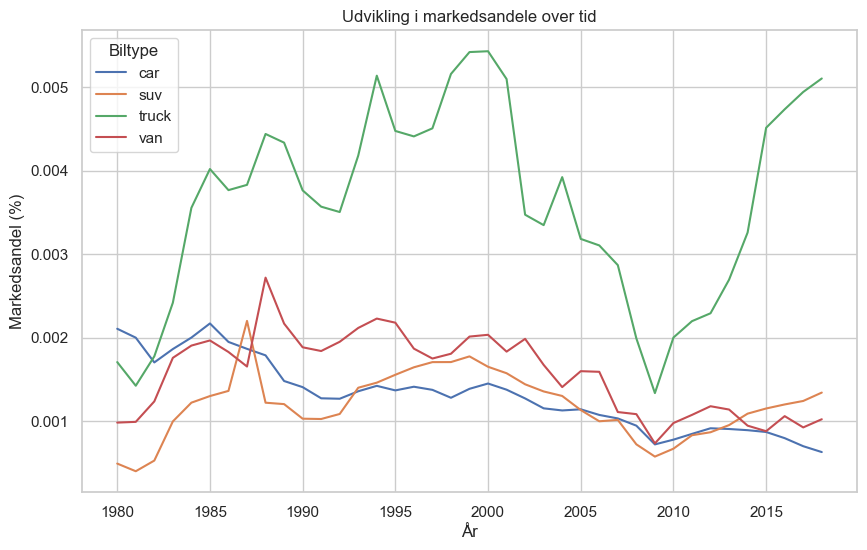

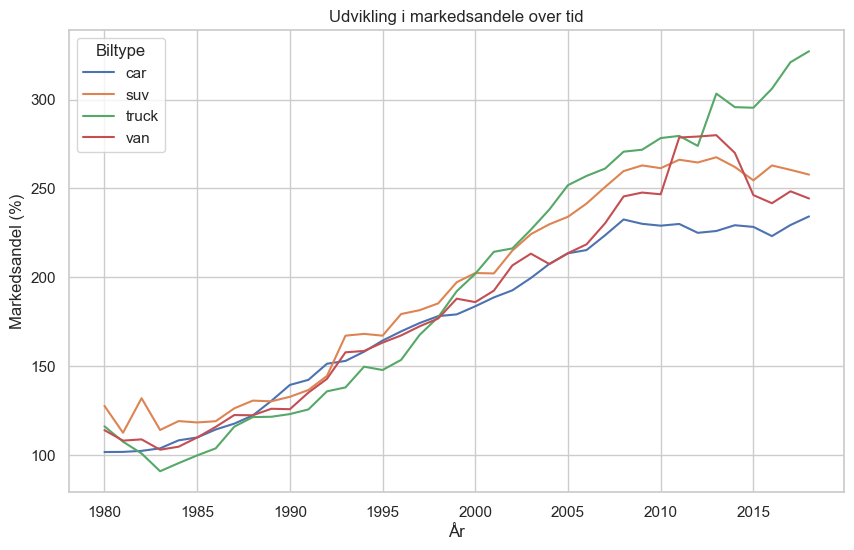

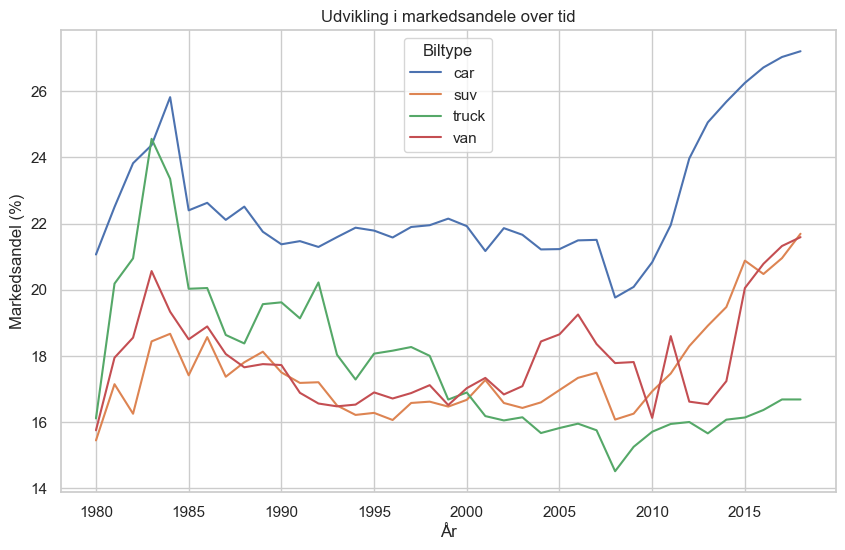

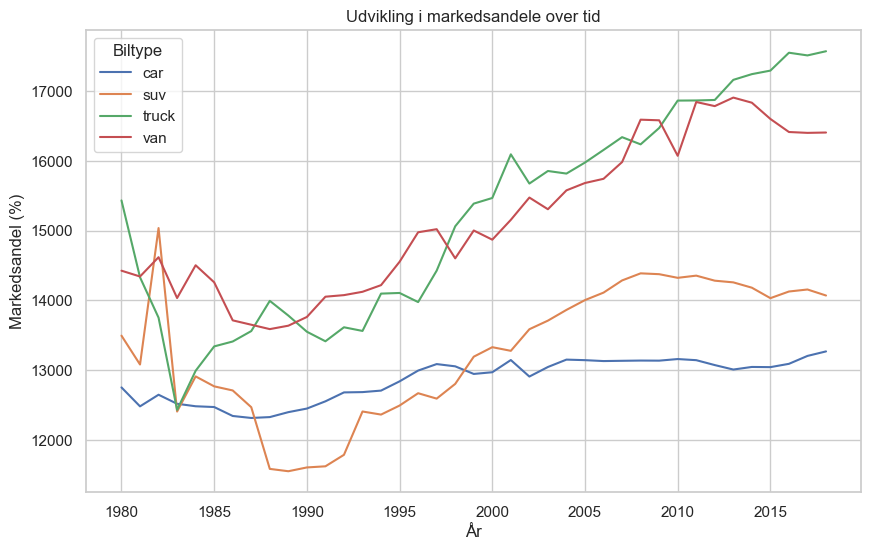

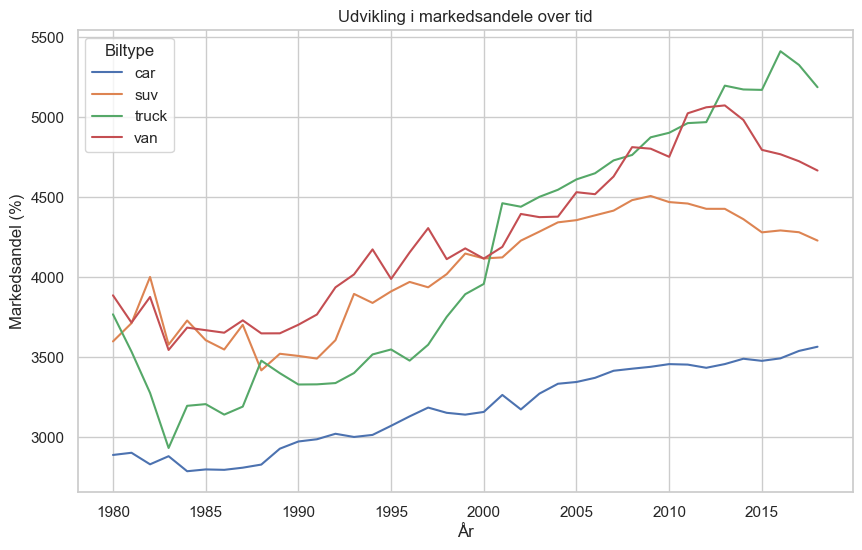

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Justér stilen for plottene
sns.set(style="whitegrid")

# Plot priser over tid
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='price', hue='type')
plt.title("Udvikling i bilpriser over tid")
plt.xlabel("År")
plt.ylabel("Pris (gennemsnit i $1000)")
plt.legend(title='Biltype')
plt.show()

# Plot markedsandele over tid
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='market_share', hue='type')
plt.title("Udvikling i markedsandele over tid")
plt.xlabel("År")
plt.ylabel("Markedsandel (%)")
plt.legend(title='Biltype')
plt.show()

# (Gentag for de andre variabler som 'hp', 'mpg', 'footprint', og 'weight')
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='hp', hue='type')
plt.title("Udvikling i markedsandele over tid")
plt.xlabel("År")
plt.ylabel("Markedsandel (%)")
plt.legend(title='Biltype')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='mpg', hue='type')
plt.title("Udvikling i markedsandele over tid")
plt.xlabel("År")
plt.ylabel("Markedsandel (%)")
plt.legend(title='Biltype')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='footprint', hue='type')
plt.title("Udvikling i markedsandele over tid")
plt.xlabel("År")
plt.ylabel("Markedsandel (%)")
plt.legend(title='Biltype')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='weight', hue='type')
plt.title("Udvikling i markedsandele over tid")
plt.xlabel("År")
plt.ylabel("Markedsandel (%)")
plt.legend(title='Biltype')
plt.show()

In [8]:
#1.b

### Problem 2

### Problem 3

## Problem 4

## Problem 5